## Why is this pokemon so good?!
This project is a statistical analysis on 800+ Pokemon using a dataset by Rounak Banik found on Kaggle here: https://www.kaggle.com/rounakbanik/pokemon. This analysis seeks to understand what kinds of pokemon are strong and maybe some reasons why. 

Oftentimes, when playing pokemon games you encounter pokemon that are cute like the electric squirrel Pachirisu or intimidating like Beedrill. What kinds of factors go into choosing the base stats of a pokemon and are there any factors that seem to have a correlation?

Before we start with our exploration, it is important to define what I mean by "strong". While many people calculate this differently, the way that I will be defining strong is by comparing base stat totals as well as individual stats. These stats can make-or-break a battle and it would be kind of cool to see what kind of insights we can gather from this!

Time to be a data detective!

### What we want to know
Let's start by summarizing the questions we have for this analysis!
* How are individual stats AND base stats distributed across all pokemon?
* Is there one best generation of pokemon (based on stats)?
* Are there any attributes of a pokemon that have a correlation with their stats?

### Getting a better feel of the data
Thankfully, for answering the questions that were established in the section prior, the dataset on Kaggle created by Rounak Banik will help us in our analysis. The link to this dataset is found near at top of the notebook. You can learn a little bit more about the dataset there!

I will start by going over some of the more important columns in the dataset:
* name (of the pokemon) 
* type1 
* type2 (can be null, not all pokemon have 2 types) 
* height_m: the height of a pokemon in metres 
* weight_kg: the weight of a pokemon in kilograms
* capture_rate: the likelihood that a pokemon will be caught in the wild
* baseeggsteps: the amount of steps it takes to hatch a pokemon from an egg
* experience_growth: how fast a pokemon levels up/gains experience
* against_x: how weak a pokemon is to a type
* base_totals: the base stat total
* hp: the pokemon's hp stat
* attack: the pokemon's attack stat
* defense: the pokemon's defense stat
* sp_attack: the pokemon's special attack stat
* sp_defense: the pokemon's special defense stat
* speed: the pokemon's speed stat
* generation: the generation of the pokemon's release
* is_legendary: is the pokemon a legendary?

Now let's look at the first couple of rows of the data and also get some information about our dataset!

In [ ]:
# importing our packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing our data
path = "data/pokemon.csv"
poke_data = pd.read_csv(path)
poke_data.head()

In [ ]:
# General shape our the DataFrame:
poke_data.shape

In [62]:
# General Description of our DataFrame
poke_data.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000



### Clean it up!
Now that we have a general idea of our data. It's time to start cleaning it up! From the summary of the data above, we can see that some values are missing in some of the columns. Let's see how many there are!

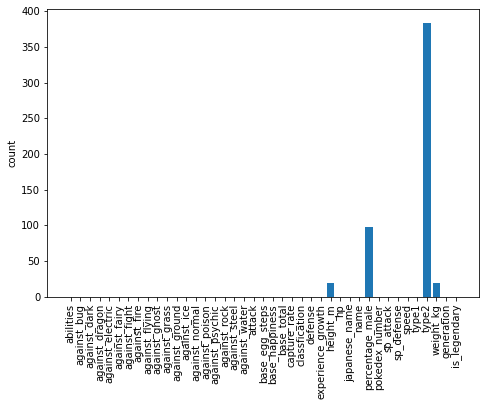

In [31]:
# Since our dataset has a lot of columns, let's use a bar plot to see the null values.
nulls = poke_data.isna().sum()

n_graph = plt.figure()
ax = n_graph.add_axes([0,0,1,1])
ax.set_ylabel('count')
plt.xticks(rotation='vertical')
ax.bar(poke_data.columns, nulls)
plt.show()

From our bar chart, we can see which columns seem to have missing information. 
* It seems that type2 has the most, but that is just because a lot of pokemon do not have a second type, so I think it is fine to leave that as is. 
* As for percentage_male, the reason why there are many nulls is because many pokemon are genderless. This issue can be resolved by turning these values to 0 as there is 0% chance that these pokemon can be male. 
* Lastly, we have height and weight. This is an odd one. Let's see why there are missing values in those spots.

In [ ]:
poke_data.loc[poke_data['height_m'].isna()].head()

Consulting pokedex numbers, we can see that the pokemon who are missing values are those with alternate regional forms. We can also see that types and stats have also been altered for pokemon with alternate forms. Thus, we must address that when cleaning the data. Note that this means for the sake our analysis, we are only going to consider original forms.

What we need to do:
* Remove unnecessary columns
* Change any genderless pokemon to have a 0 percentage_male
* Update information of stats and types for pokemon with alternate forms

To see the cleaning code for this dataset, please consult cleaning_pokemon jupyter notebook!

pokemon_cleans.csv is the cleaned dataset aside from type2 which going to be left alone.

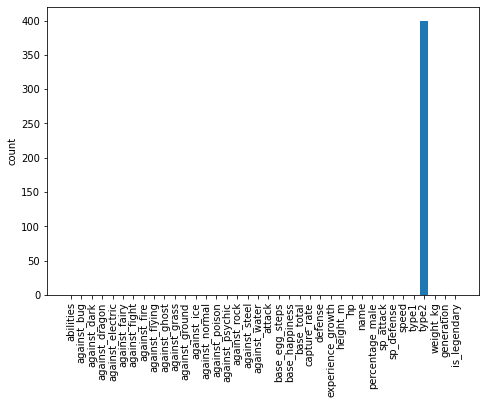

In [33]:
path_clean = 'data/pokemon_cleans.csv'
poke_clean = pd.read_csv(path_clean)

# quickly drop all the 

nulls2 = poke_clean.isna().sum()

n2_graph = plt.figure()
ax = n2_graph.add_axes([0,0,1,1])
ax.set_ylabel('count')
plt.xticks(rotation='vertical')
ax.bar(poke_clean.columns, nulls2)
plt.show()

Success! Our cleaning efforts are now done and we can finally start exploring our data and even start answering our questions!

### Summary Statistics


Now let's look at some general statistics for all the stat data.

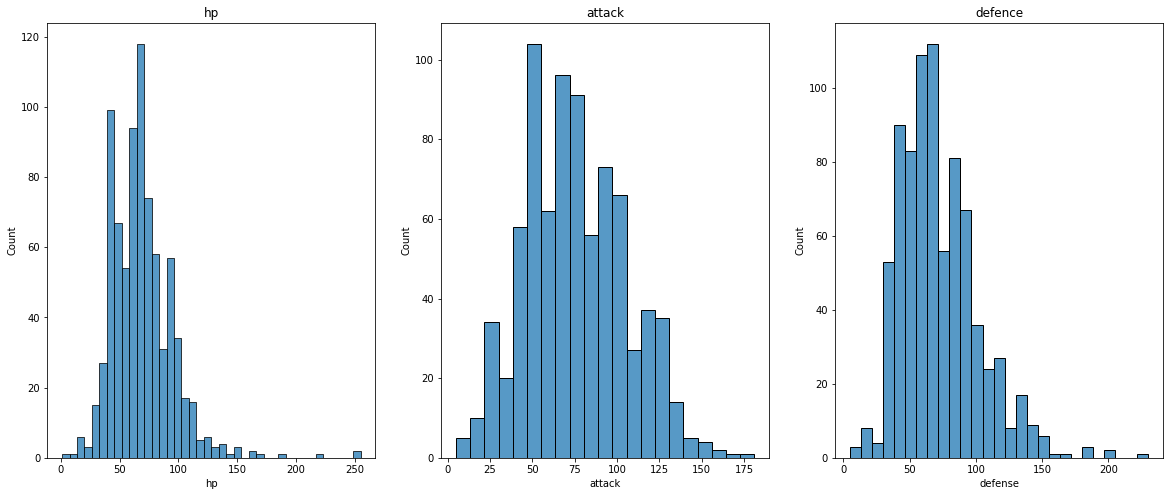

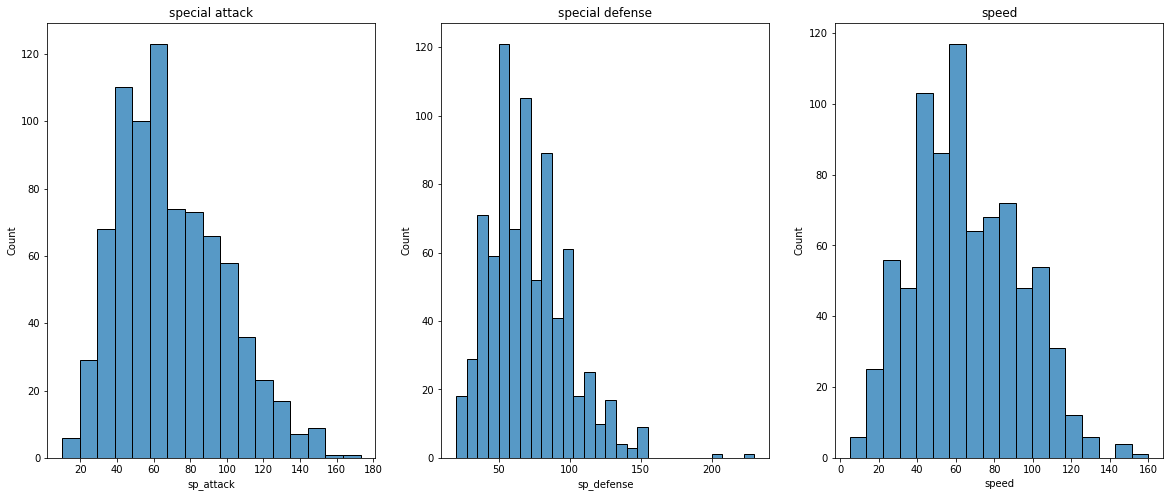

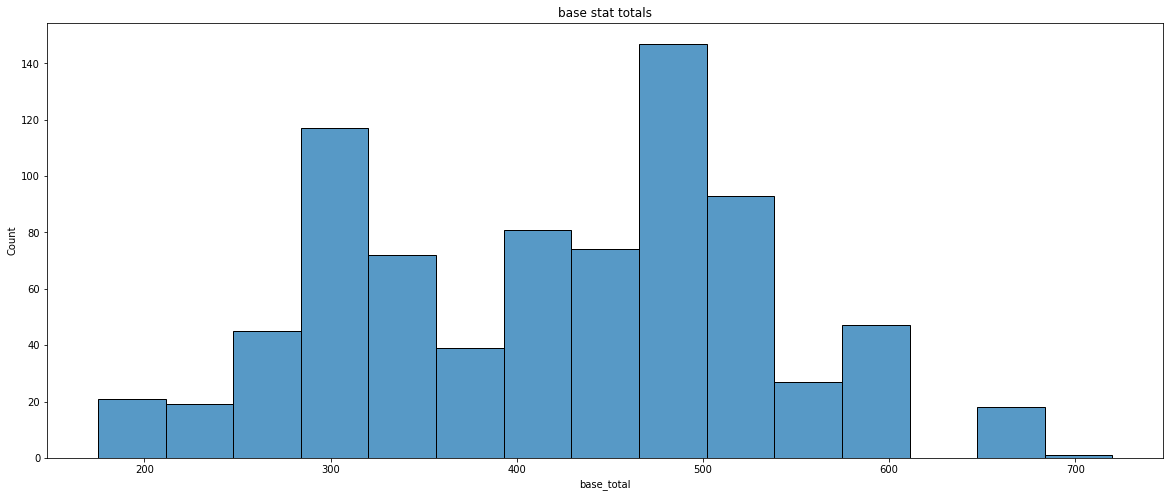

In [63]:
# first half
fig, axes = plt.subplots(1, 3, figsize = (20,8))
sns.histplot(data=poke_clean['hp'], ax=axes[0]).set_title("hp")
sns.histplot(data=poke_clean['attack'], ax=axes[1]).set_title("attack")
sns.histplot(data=poke_clean['defense'], ax=axes[2]).set_title("defence")

# second half
fig, axes = plt.subplots(1, 3, figsize=(20,8))
sns.histplot(data=poke_clean['sp_attack'], ax=axes[0]).set_title("special attack")
sns.histplot(data=poke_clean['sp_defense'], ax=axes[1]).set_title("special defense")
sns.histplot(data=poke_clean['speed'], ax=axes[2]).set_title("speed")

# base totals
fig = plt.subplots(1, 1, figsize=(20,8))
sns.histplot(data = poke_clean["base_total"]).set_title("base stat totals")

plt.show()

Next, let's look at the boxplots to get a better idea of how the data is distributed and to see if there are any outliers.

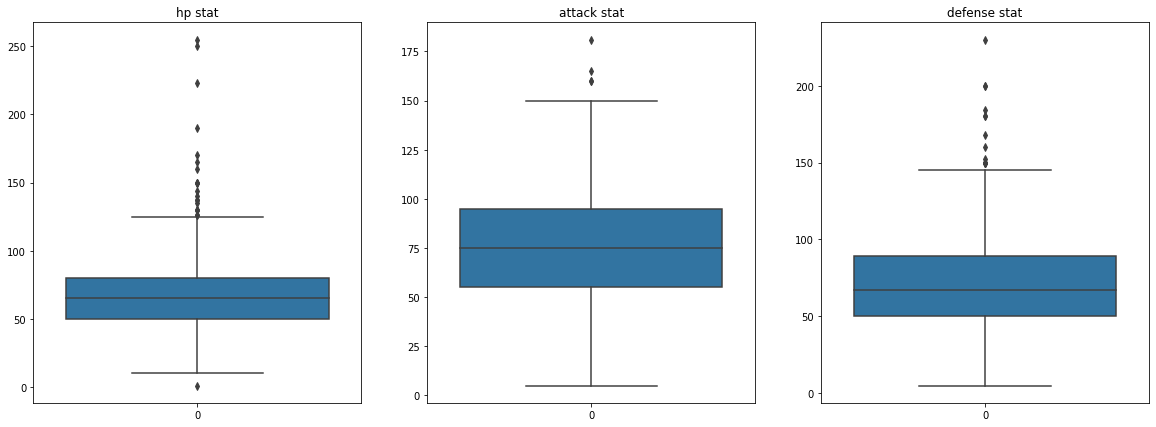

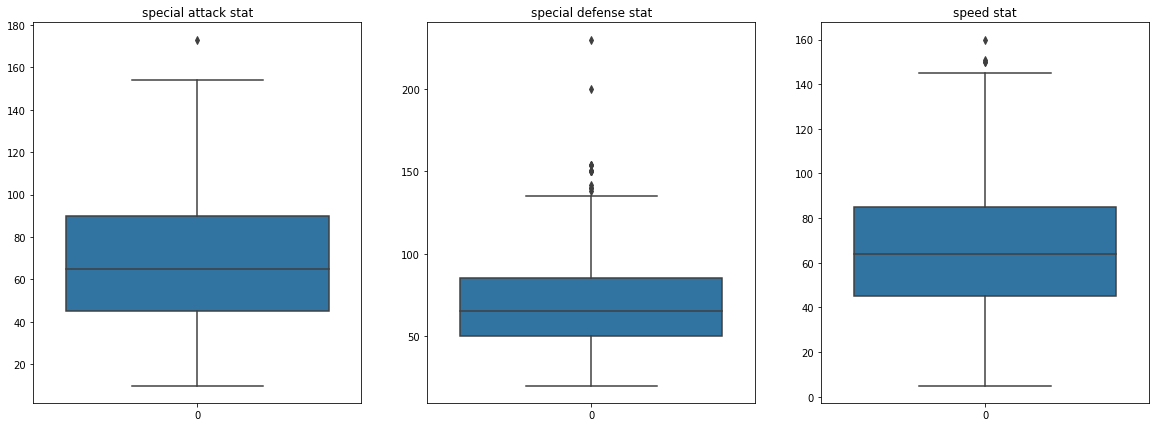

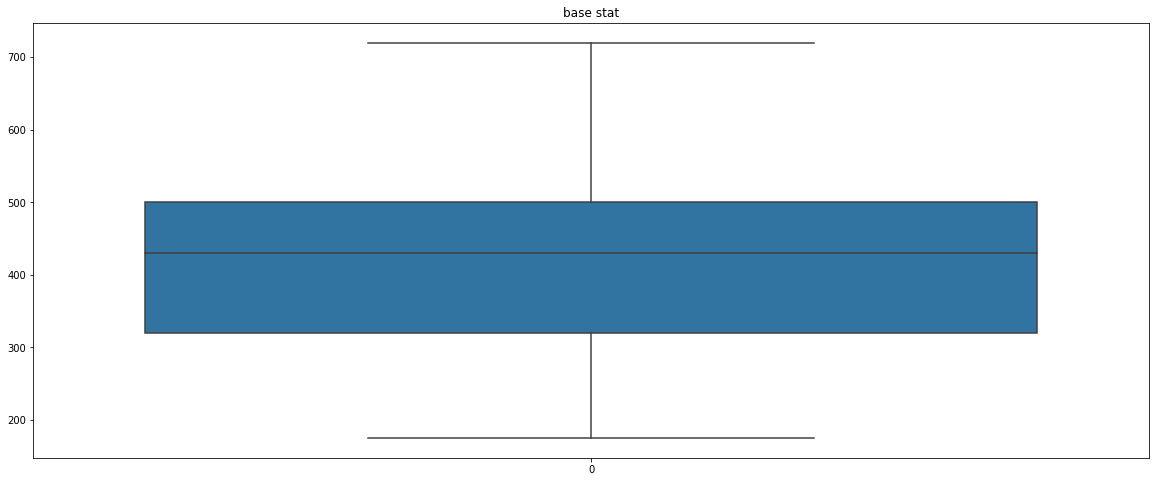

In [64]:
# first half
fig, axes = plt.subplots(1, 3, figsize=(20,7))
sns.boxplot(data = poke_clean['hp'], ax=axes[0]).set_title("hp stat")
sns.boxplot(data = poke_clean['attack'], ax=axes[1]).set_title("attack stat")
sns.boxplot(data = poke_clean['defense'], ax=axes[2]).set_title("defense stat")

# second half
fig, axes = plt.subplots(1, 3, figsize=(20,7))
sns.boxplot(data = poke_clean['sp_attack'], ax=axes[0]).set_title("special attack stat")
sns.boxplot(data = poke_clean['sp_defense'], ax=axes[1]).set_title("special defense stat")
sns.boxplot(data = poke_clean['speed'], ax=axes[2]).set_title("speed stat")

# total base stats
fig = plt.subplots(1, 1, figsize=(20,8))
# sns.boxplot(data = poke_clean['base_total'], ax=axes[0]).set_title("base stat totals")
sns.boxplot(data = poke_clean['base_total']).set_title("base stat")
plt.show()

As we can see, every stat has outliers but oddly enough, the base stat totals do not have any outliers. Thankfully, this is pretty explainable. All base stat totals are below 680 which is exclusively reserved for some pokemon with legendary status (and there are a couple of these).

We can also see that most pokemon's attack stat tends to be their highest stat.

Now let's see each generation stands up to see if a particular generation has harder to beat pokemon!

Text(0.5, 1.0, 'base stat - gen7')

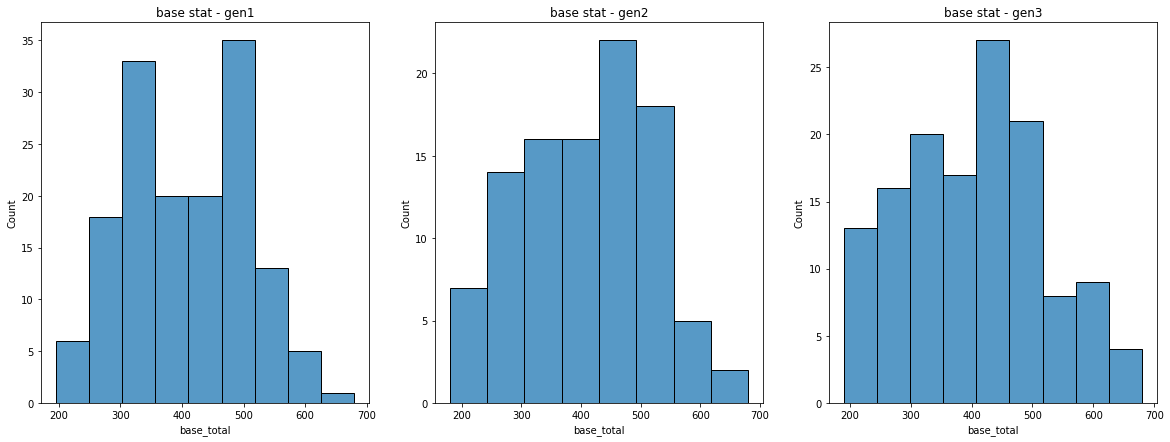

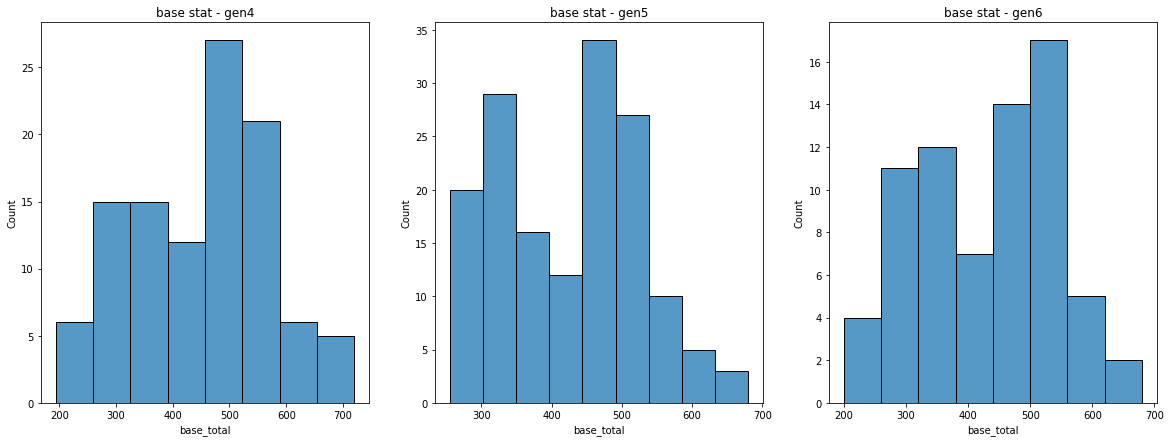

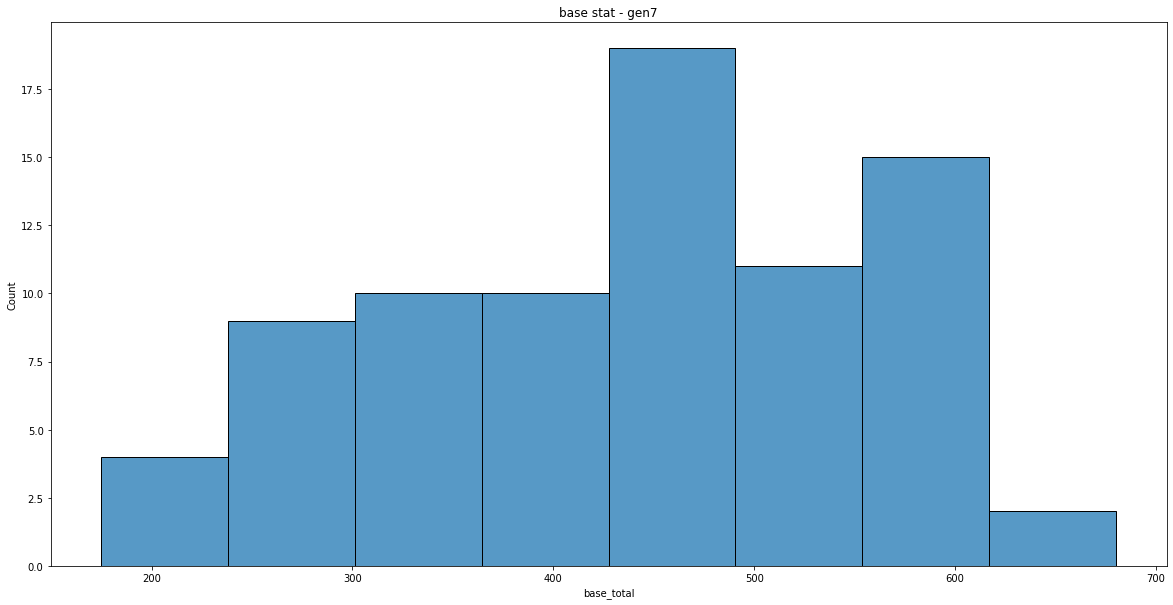

In [68]:
# Generation 1
gen_1 = poke_clean.loc[poke_clean.generation == 1]
# Generation 2
gen_2 = poke_clean.loc[poke_clean.generation == 2]
# Generation 3
gen_3 = poke_clean.loc[poke_clean.generation == 3]
# Generation 4
gen_4 = poke_clean.loc[poke_clean.generation == 4]
# Generation 5
gen_5 = poke_clean.loc[poke_clean.generation == 5]
# Generation 6
gen_6 = poke_clean.loc[poke_clean.generation == 6]
# Generation 7
gen_7 = poke_clean.loc[poke_clean.generation == 7]

# first section
fig, axes = plt.subplots(1, 3, figsize=(20,7))
sns.histplot(data = gen_1["base_total"], ax=axes[0]).set_title("base stat - gen1")
sns.histplot(data = gen_2["base_total"], ax=axes[1]).set_title("base stat - gen2")
sns.histplot(data = gen_3["base_total"], ax=axes[2]).set_title("base stat - gen3")

# second section
fig, axes = plt.subplots(1, 3, figsize=(20,7))
sns.histplot(data = gen_4["base_total"], ax=axes[0]).set_title("base stat - gen4")
sns.histplot(data = gen_5["base_total"], ax=axes[1]).set_title("base stat - gen5")
sns.histplot(data = gen_6["base_total"], ax=axes[2]).set_title("base stat - gen6")

# third section
fig, axes = plt.subplots(1, 1, figsize=(20,10))
sns.histplot(data = gen_7["base_total"]).set_title("base stat - gen7")

These histograms might not be the best way to find out the best generation simply because there are a different number of pokemon released in each generation! To get a little bit more of a clearer picture, let's use the median of each generation as the mean might be a little bit more skewed due to the prevalence of outliers!

In [69]:
gen1_median = gen_1['base_total'].median()
gen2_median = gen_2['base_total'].median()
gen3_median = gen_3['base_total'].median()
gen4_median = gen_4['base_total'].median()
gen5_median = gen_5['base_total'].median()
gen6_median = gen_6['base_total'].median()
gen7_median = gen_7['base_total'].median()

medians = [['gen1', gen1_median], ['gen2', gen2_median], ['gen3', gen3_median], 
['gen4', gen4_median], ['gen5', gen5_median], ['gen6', gen6_median], 
['gen7', gen7_median]]

median_table = pd.DataFrame(medians, columns = ["Generation", "Median Base Stat Total"])
median_table

,Generation,Median Base Stat Total
0,gen1,405.0
1,gen2,415.0
2,gen3,410.0
3,gen4,480.0
4,gen5,445.5
5,gen6,457.0
6,gen7,477.0


We can see that generation 4 seems to have some of the strongest original pokemon. It is no wonder that Pokemon Brilliant Diamonds and Shining Pearl were so difficult!

Next, let's see how well each field correlates with each other.

<AxesSubplot:>

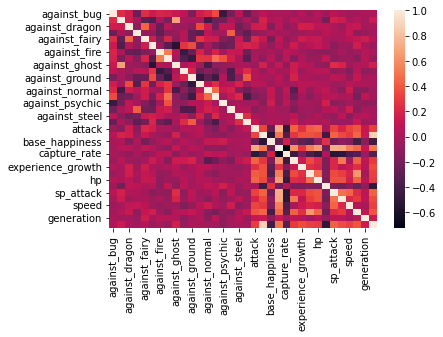

In [61]:
sns.heatmap(poke_clean.corr())

Looking at the heatmap, we can see that it seems as though there are not any variables that are strongly postive correlations but we can see that there are some fairly strong negative correlations with base_happiness and capture_rate!

### Conclusion
From this dataset, we were able to answer a couple of our questions. We now know how distributed pokemon's stats are across every single pokemon and across every generation. We were also able to find out which generations had the strongest original pokemon! We were also able to identify some correlations between variables in the dataset.

### Next Steps
Some next steps for this project:
* Have a more in-depth look into the correlation heatmap to see if there is anything else there
* remove some of the outliers to see how the data changes
* Create a generator for some of the best teams in each generation based on this data

#### Thanks for making it this far!